## Домашняя работа "Оценка точности модели, переобучение, регуляризация"
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [4]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [5]:
Y = data['affair']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [8]:
model = LogisticRegression()
model.fit(X_train, 
          Y_train)

In [10]:
predictions = model.predict_proba(X_test)
predictions

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059867, 0.45940133],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [56]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
thres_ = 0.5 # порог

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= thres_:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [57]:
print(tp) # True positive
print(fp) # False positive
print(fn) # False negative
print(tn) # True negative

226
131
381
1172


Коэффициент True Positive Rate:

$$TPR = {\frac{TP}{TP+FN}}$$

Коэффициент False Positive Rate:

$$FPR = {\frac{FP}{FP+TN}}$$

In [58]:
FPR = fp / (fp + tn)
TPR = tp / (tp + fn)
print(f'FPR: {FPR} \n TPR: {TPR}')

FPR: 0.10053722179585571 
 TPR: 0.3723228995057661


In [65]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [66]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [67]:
for ind_, num in enumerate(thres):
    if num <= thres_:
        print(f'FPR: {fpr[ind_-1]} \n TPR: {tpr[ind_-1]}')
        break

FPR: 0.10053722179585571 
 TPR: 0.3723228995057661


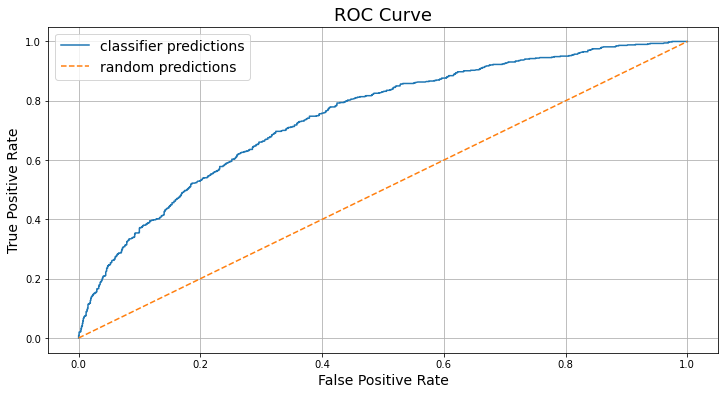

AUC is 0.75


In [100]:
plt.figure(figsize=(12,6))
plt.title("ROC Curve", fontsize=18)
plt.grid()
plt.plot(fpr, tpr, label='classifier predictions')
plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100), 
         linestyle='--', 
         label='random predictions')
plt.legend(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.show()
print("AUC is %.2f" %auc(fpr, tpr))

In [80]:
def count_fpr_tpr(thres_):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres_:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    FPR = fp / (fp + tn)
    TPR = tp / (tp + fn)
    return [FPR, TPR]

In [91]:
dots = np.array([count_fpr_tpr(thres_=thr) for thr in np.linspace(0,1,100)]).T

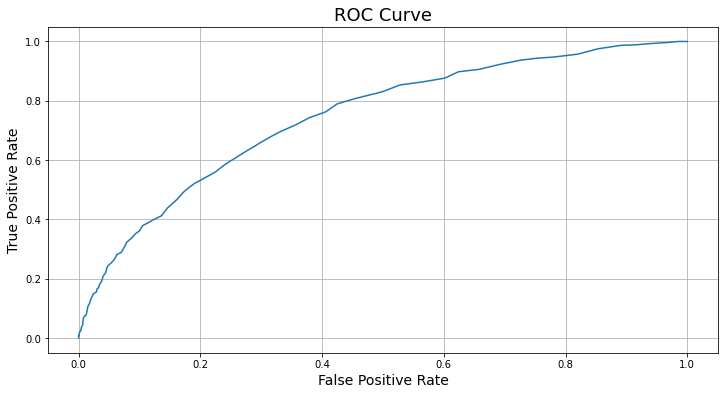

In [101]:
plt.figure(figsize=(12,6))
plt.title("ROC Curve", fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid()
plt.plot(dots[0], dots[1], label='classifier predictions')

In [ ]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
precision

In [93]:
def count_recall_precision(thres_):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres_:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return [recall, precision]

In [98]:
precision_recall_dots = np.array([count_recall_precision(thres_=thr) for thr in np.linspace(0.1,0.9,100)]).T

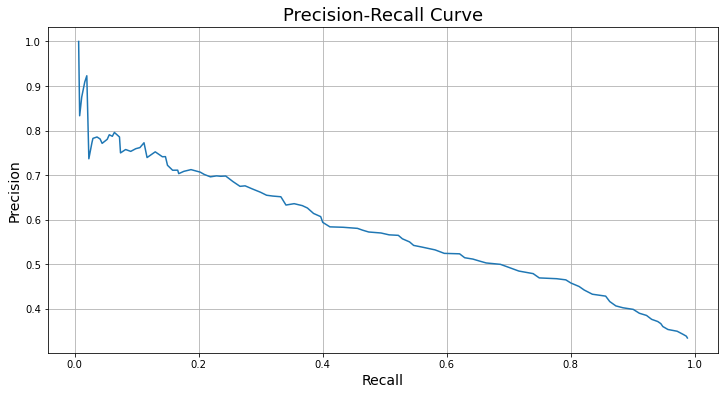

In [102]:
plt.figure(figsize=(12,6))
plt.title("Precision-Recall Curve", fontsize=18)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid()
plt.plot(precision_recall_dots[0], precision_recall_dots[1], label='classifier predictions')